# Assignement no 15 (Random Forests - Company data  )

## <font color="red">A cloth manufacturing company is interested to know about the segment or attributes causes high sale. <br>Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.dropna()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


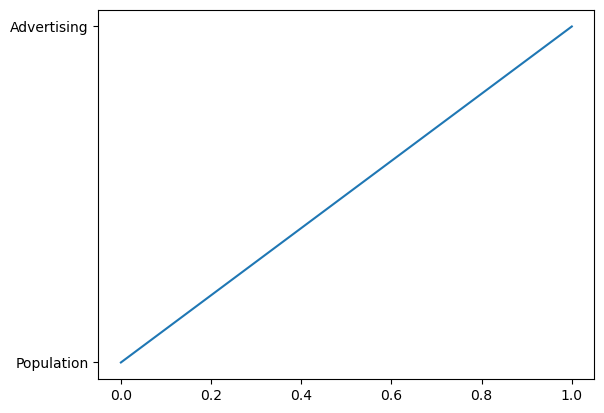

In [5]:
import matplotlib.pyplot as plt
plt.plot(['Population',"Advertising"])
plt.show()

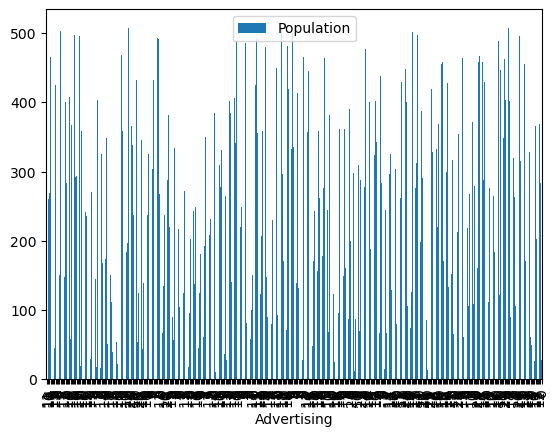

In [6]:
series1 = data
series1.plot("Advertising","Population",kind="bar")
plt.show()

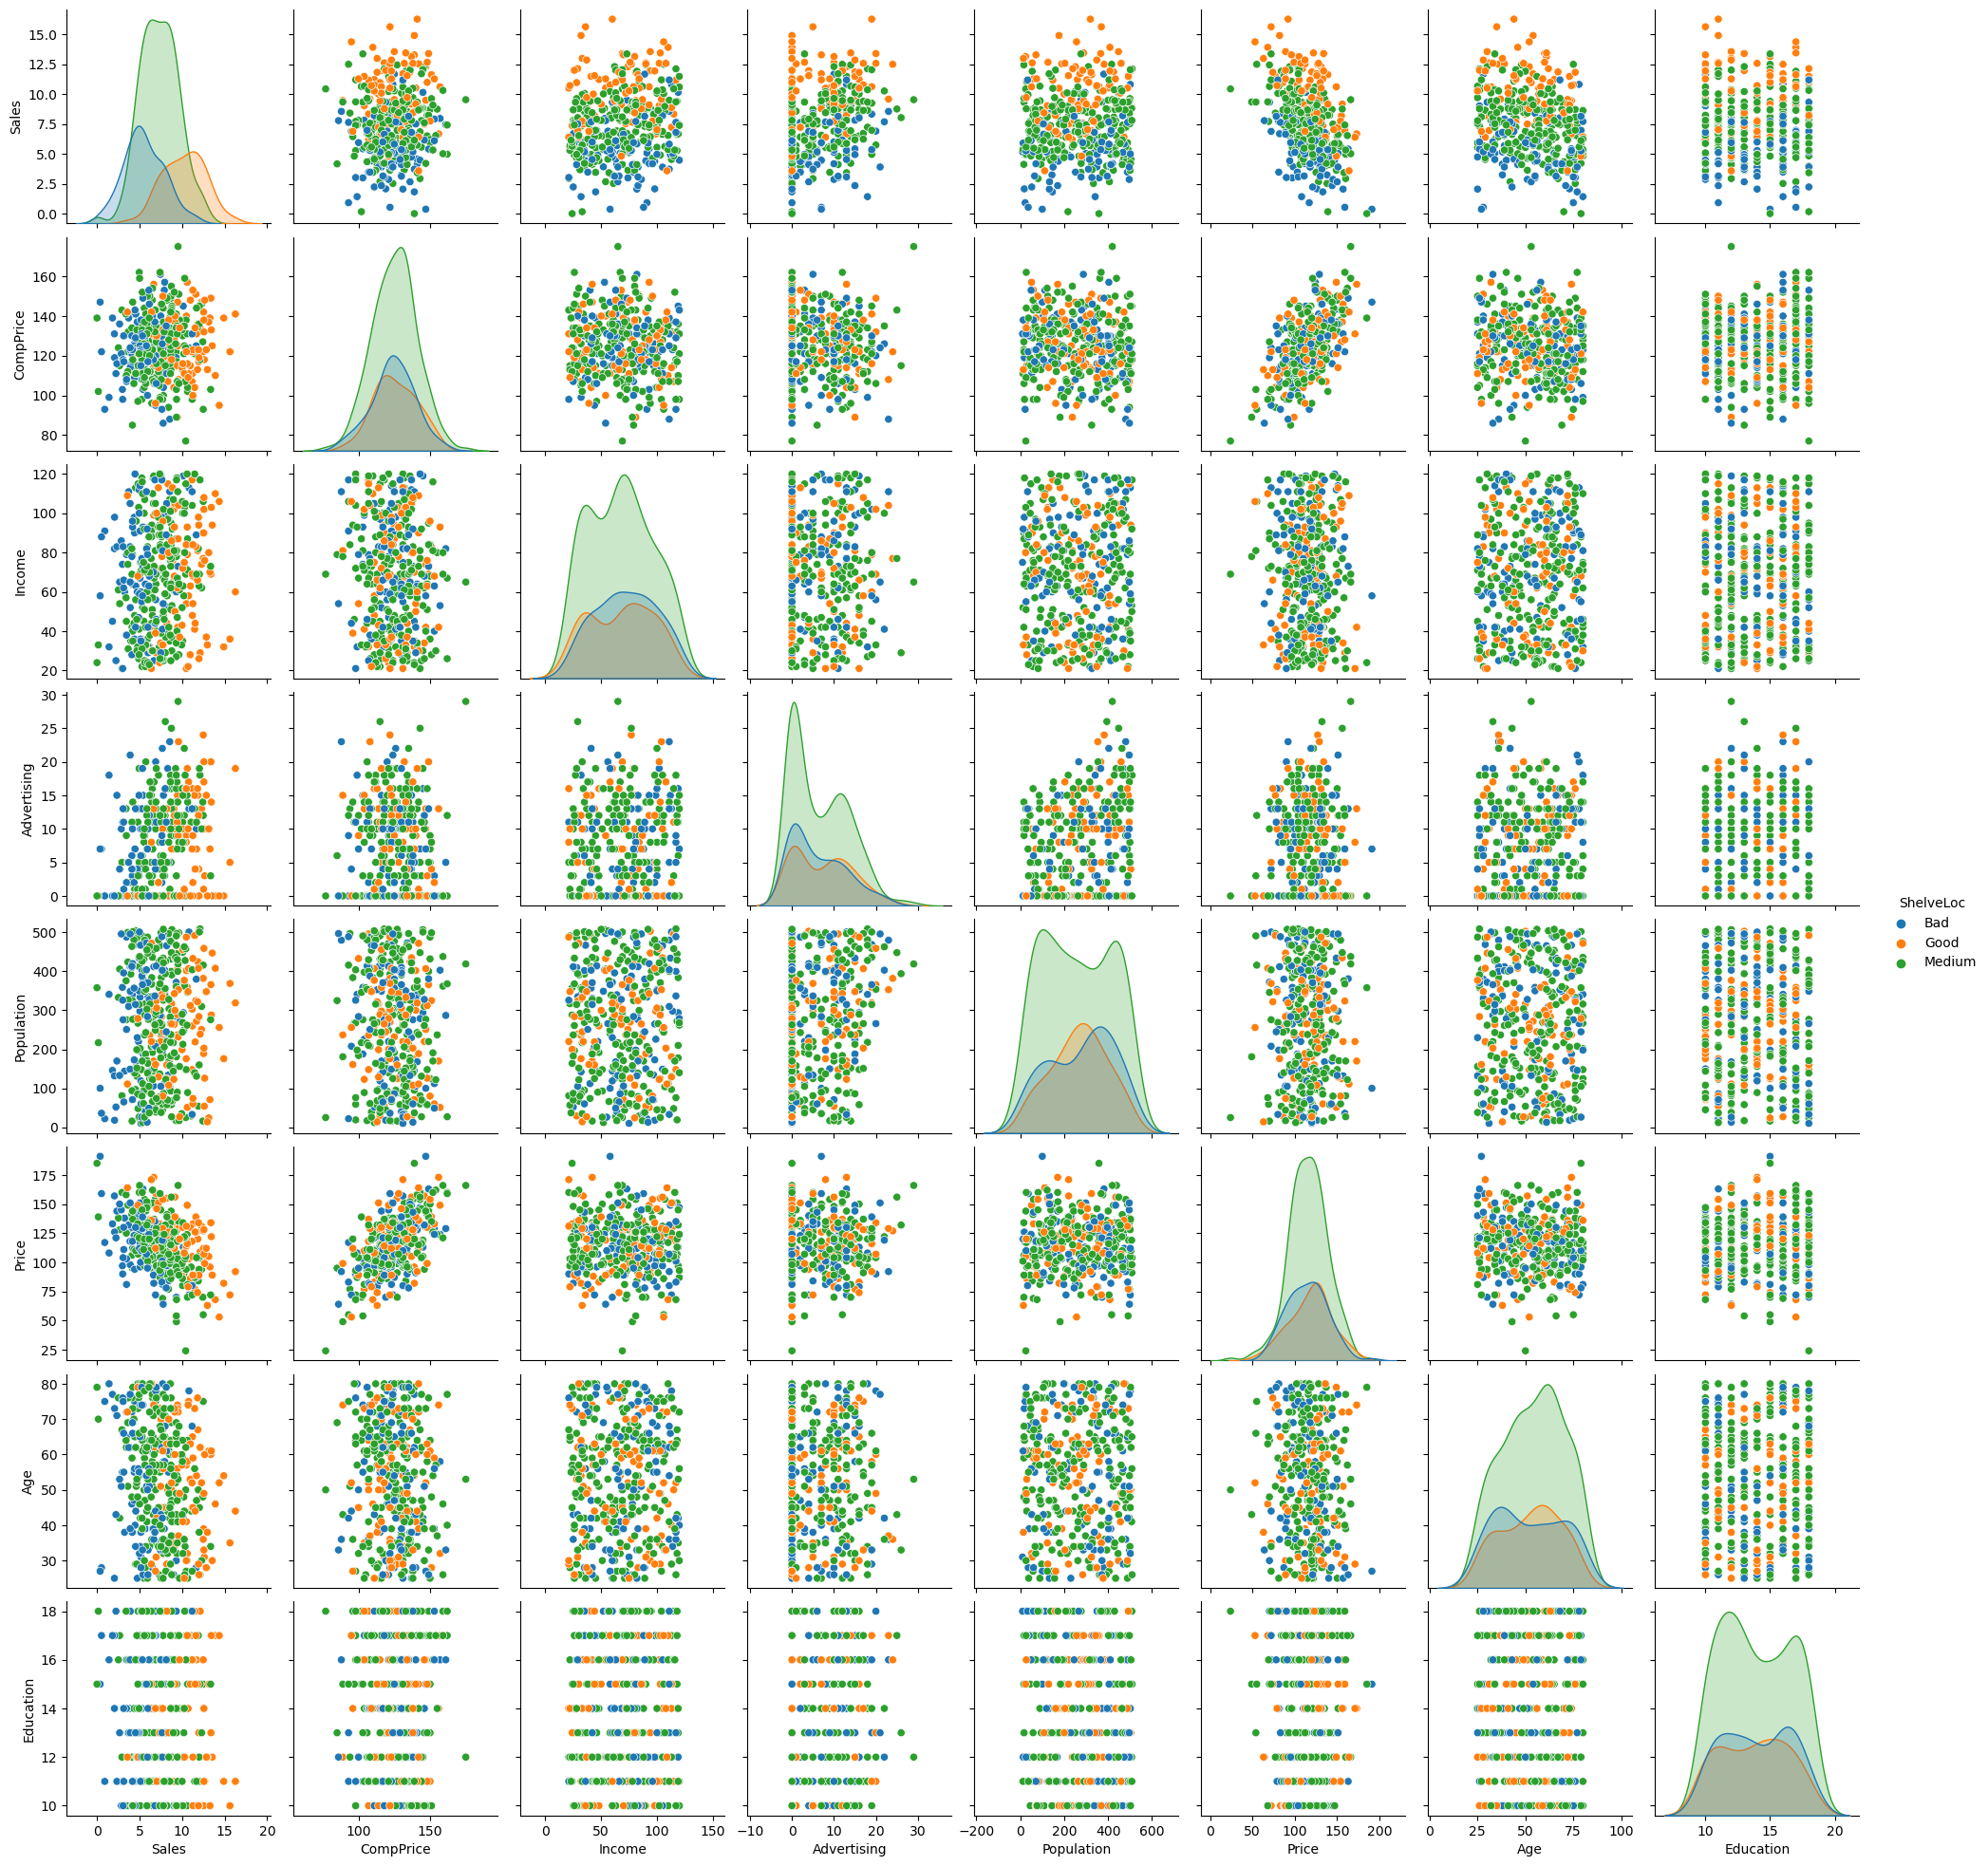

In [7]:
sns.pairplot(data, hue="ShelveLoc")

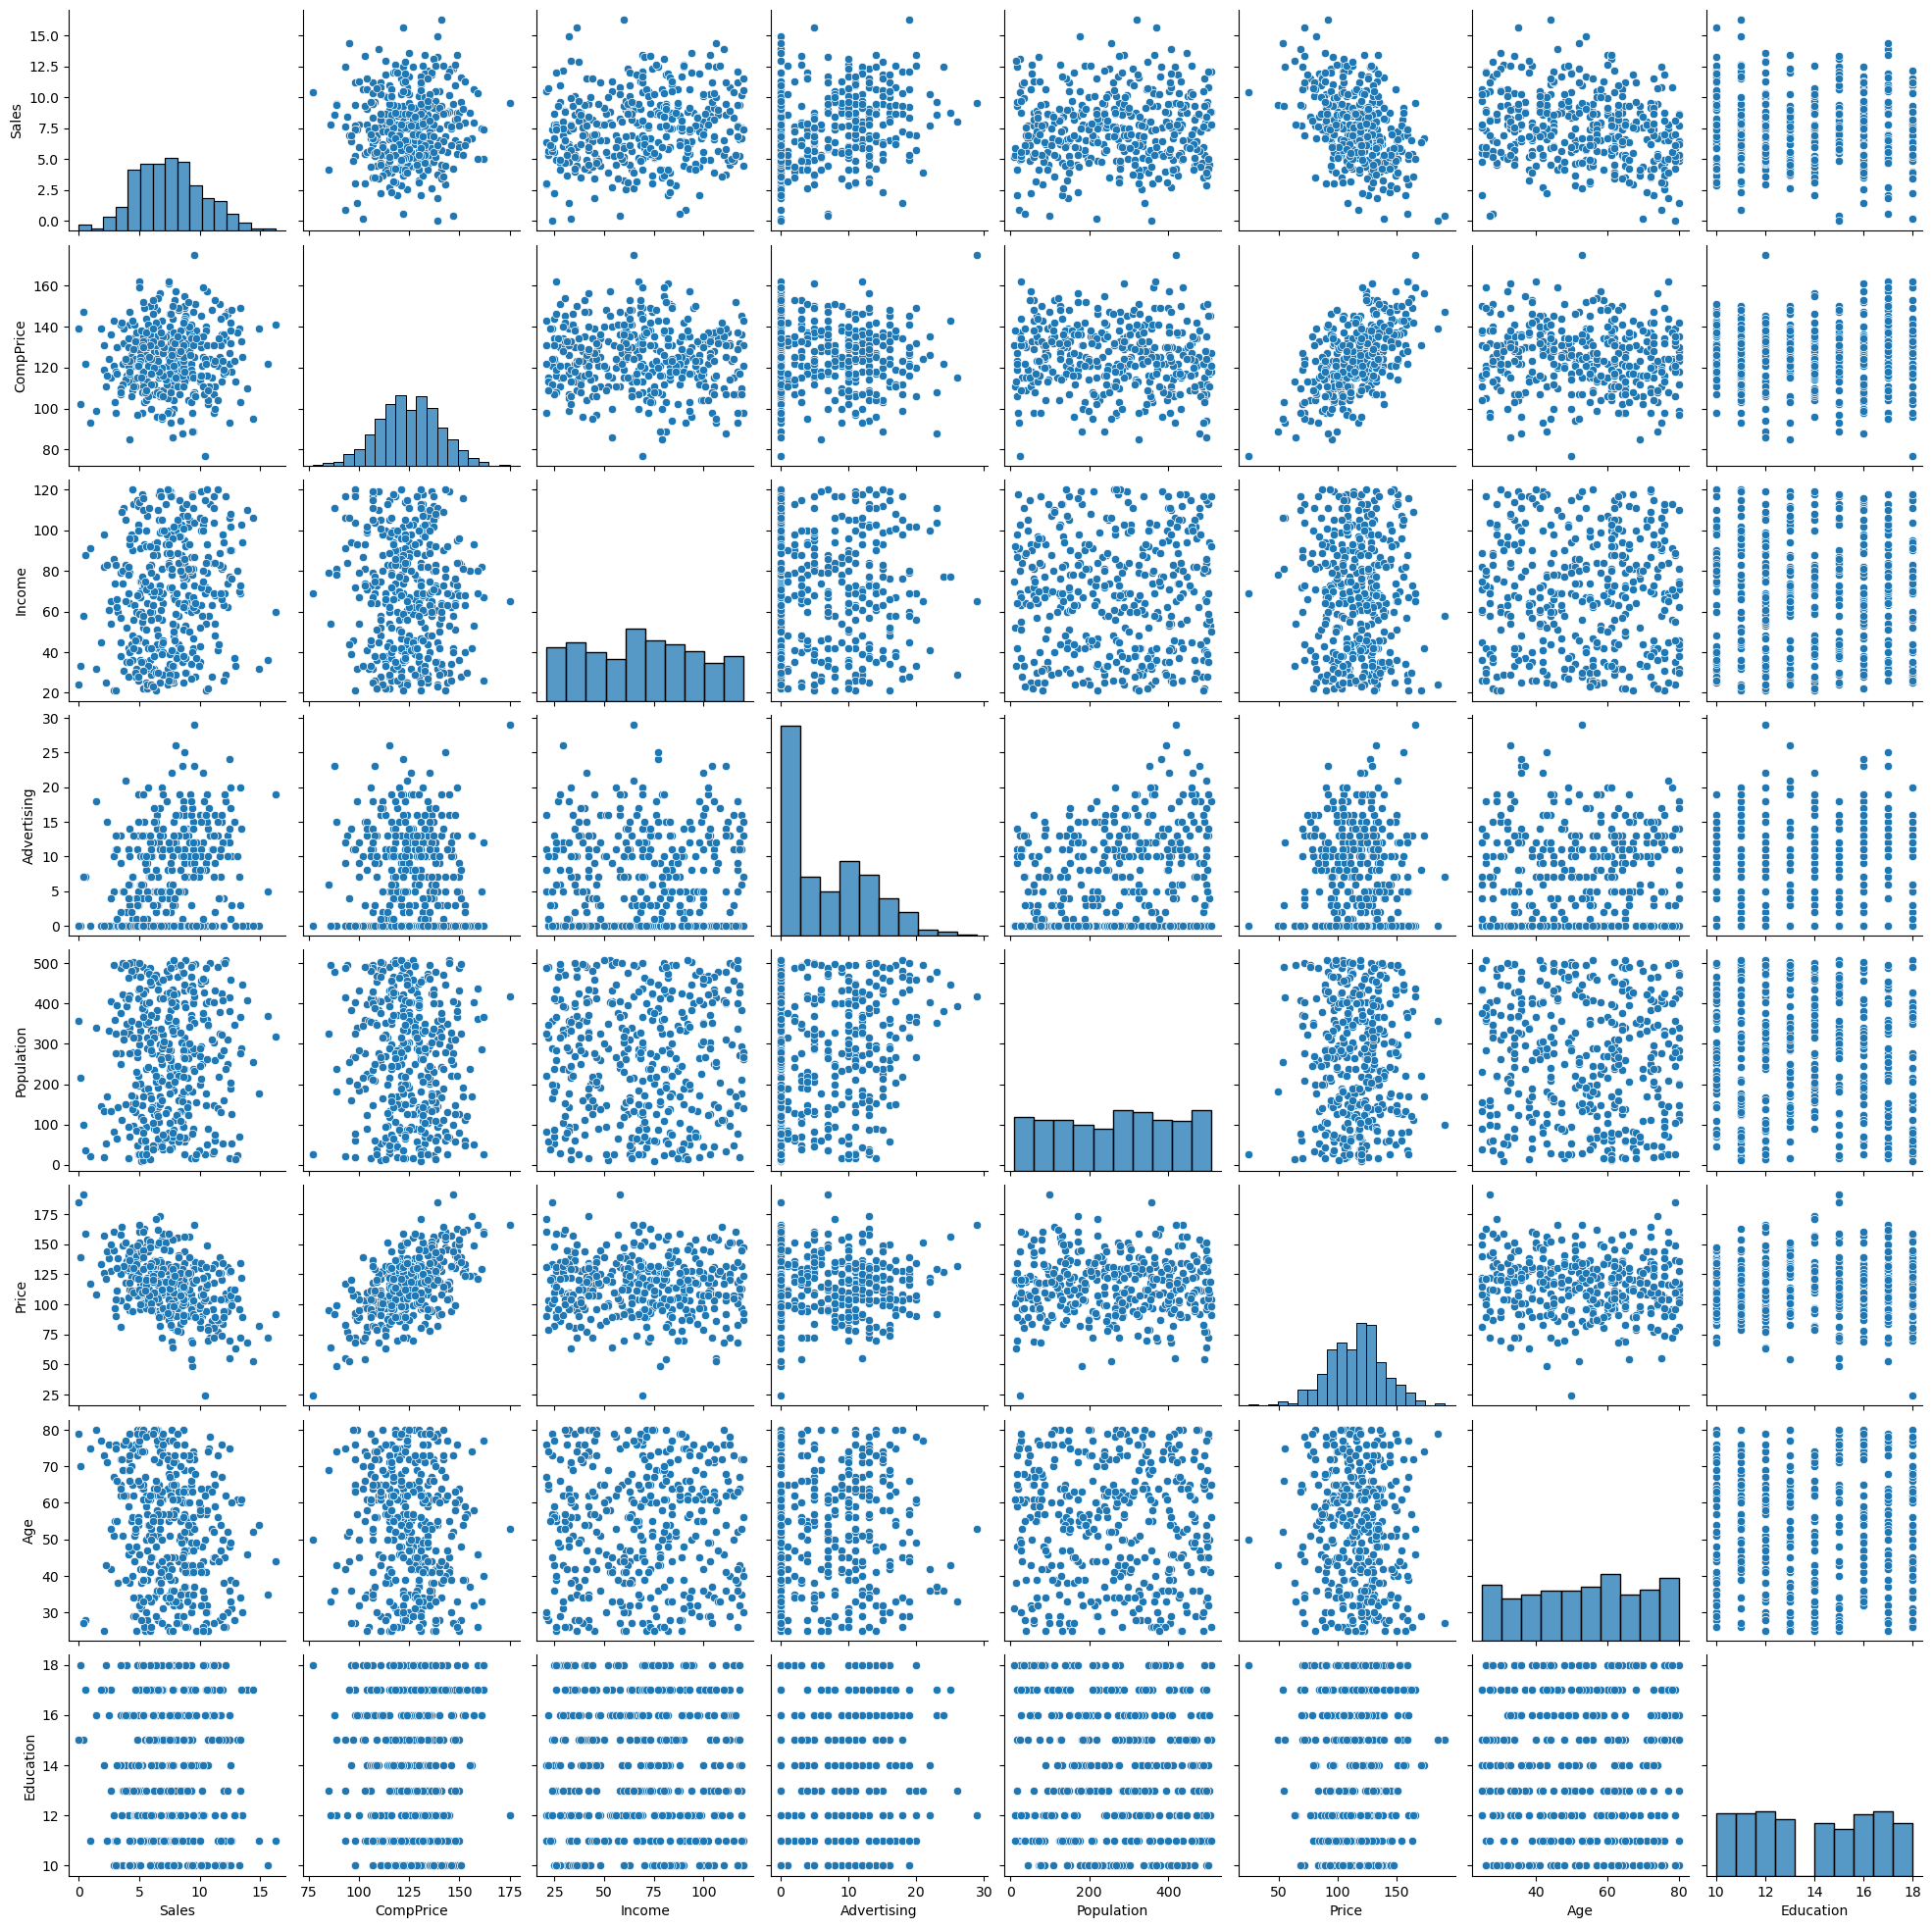

In [8]:
sns.pairplot(data)

In [9]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
# Creating Caterogical data on Sales Variable :
print("Length of Sales Variable : ",len(data["Sales"]))
print("Mean of Sales Variable : ",data["Sales"].mean())
data["Sales"].sort_values()

Length of Sales Variable :  400
Mean of Sales Variable :  7.496325


174     0.00
106     0.16
165     0.37
143     0.53
57      0.91
       ...  
18     13.91
367    14.37
25     14.90
316    15.63
376    16.27
Name: Sales, Length: 400, dtype: float64

In [11]:
data["highsales"] = np.where((data["Sales"] < 9),"Low","High")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [12]:
data["highsales"].describe()

count     400
unique      2
top       Low
freq      286
Name: highsales, dtype: object

In [13]:
data_new = data.iloc[:,1:]
data_new

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [14]:
#Complete Company dataset :
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_new["ShelveLoc"]= label_encoder.fit_transform(data_new["ShelveLoc"])
data_new["Urban"]= label_encoder.fit_transform(data_new["Urban"])
data_new["US"]= label_encoder.fit_transform(data_new["US"])
data_new["highsales"]= label_encoder.fit_transform(data_new["highsales"])
data_new.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [15]:
array = data_new.values
X = array[:,:-1]
y = array[:,-1]

In [16]:
# Splitting data into train and test dataset :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [17]:
# Creating Model :
model = RandomForestClassifier(n_estimators = 100, max_features = 4)
model.fit(X_train,y_train)

RandomForestClassifier(max_features=4)

In [18]:
# Prediction and Accuracy on train dataset :
predict = model.predict(X_train)
pd.Series(predict).value_counts()

1    231
0     89
dtype: int64

In [19]:
pd.crosstab(y_train,predict)

col_0,0,1
row_0,,
0,89,0
1,0,231


In [20]:
# Accuracy :
np.mean(predict == y_train)

1.0

In [21]:
# Prediction and Accuracy on train dataset :
predict = model.predict(X_test)
pd.Series(predict).value_counts()

1    64
0    16
dtype: int64

In [22]:
pd.crosstab(y_test,predict)

col_0,0,1
row_0,,
0,12,13
1,4,51


In [23]:
# Accuracy :
np.mean(predict == y_test)

0.7875

In [24]:
# Get Importance Feature :
importance = model.feature_importances_
importance

array([0.10093728, 0.09354908, 0.13748882, 0.09633022, 0.22750004,
       0.13007805, 0.11363676, 0.06740624, 0.01300758, 0.02006593])

<AxesSubplot:>

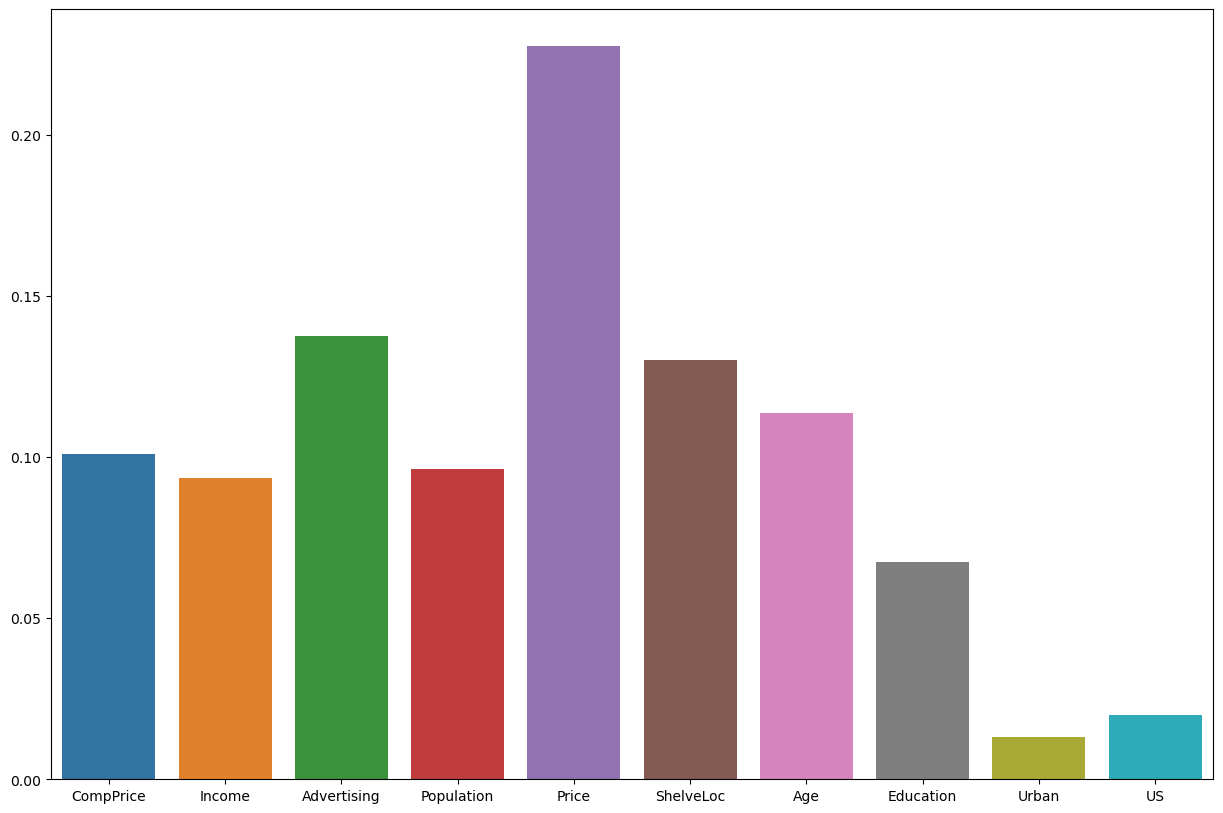

In [25]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"],y=model.feature_importances_)
